# RACISM DETECTOR

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
import re
pd.set_option('max_colwidth', 800)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### DATASET I

In [2]:
#loading dataset
d1=pd.read_csv('train.csv', index_col=[0])
d1.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


Description of the dataset
1. Count : number of users who coded each tweet
2. hate_speech : number of users who judged the tweet to be hate speech
3. offensive_language : number of users who judged the tweet to be offensive
4. neither : number of users who judged the tweet to be neither offensive nor non-offensive

In [3]:
# checking how many no of rows and columns present in the dataset
d1.shape

(24783, 6)

In [4]:
# checking any null values or missing values present in the dataset
d1.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
d1.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [6]:
# dropping unnecessary columns. so i am going to use both class and tweet column for model building.
d1.drop(['count', 'hate_speech', 'offensive_language', 'neither'], axis = 1, inplace=True)
d1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [7]:
#checking how many labels present in the dataset. so there are three different labels present in the dataset
d1['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [8]:
# class label [0 - hate speech, 1 - offensive language, 2 - neither] 
# so i am taking hate speech and offensive language as 1 , neither as 0
z = {0 : 1, 1 : 1,  2 : 0}
d1['class'] = d1['class'].map(z)
d1.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [9]:
# checking the count for labels
d1['class'].value_counts()

1    20620
0     4163
Name: class, dtype: int64

##### This is perfectly imbalanced dataset. 

In [10]:
# renaming the column name 'class' as 'label'
d1.rename(columns ={'class':'label'}, inplace = True)
d1.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


### DATASET II

In [11]:
# loading the dataset 
d2 = pd.read_csv('train1.csv')
d2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [12]:
# checking the no of rows and columns present in the dataset.
d2.shape

(31962, 3)

In [13]:
# dropping the unique id column in the dataset.
d2.drop(['id'], axis=1, inplace=True)
d2.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


In [14]:
# checking the label count
d2['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### This also shows us that this is imbalanced dataset.

In [15]:
d2.isnull().sum()

label    0
tweet    0
dtype: int64

### COMBINING BOTH DATASETS

In [16]:
# combining the two datasets or concatenating the two dataset.
frame = [d1, d2]
df = pd.concat(frame)
df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [17]:
# checking the no of rows and columns present in the dataset
df.shape

(56745, 2)

In [18]:
# now it is partially balanced dataset.
df['label'].value_counts()

0    33883
1    22862
Name: label, dtype: int64

In [19]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    #remove double spaces 
    text = re.sub('\s+', ' ', text)
    
    return text

In [20]:
# applying that into function. And also noticed that 'RT' is present in the dataset. so removing them.
df["clean_tweet"] = df['tweet'].apply(lambda x: clean_text(x))
df['clean_tweet'] = df['clean_tweet'].str.replace('RT', '')
df.head(10)

,label,tweet,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,As a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats cold tyga dwn bad for cuffin dat hoe in the st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,The shit you hear about me might be true or it might be faker than the bitch who told it to ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",The shit just blows me claim you so faithful and down for somebody but still fucking with hoes
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",I can not just sit up and HATE on another bitch I got too much shit going on
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause I m tired of you big bitches coming for us skinny girls
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting Mariam bitch


In [21]:
# dropping the uncleaned text column "tweet"
df = df.drop(['tweet'], axis=1)

In [22]:
# renaming the column clean_tweet to 'tweet
df.rename(columns = {'clean_tweet':'tweet'}, inplace = True)

In [23]:
# saving the data into csv format.
df.to_csv('data.csv', index=False)

In [24]:
df1= pd.read_csv('data.csv')
df1.head()

,label,tweet
0,0,As a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out
1,1,boy dats cold tyga dwn bad for cuffin dat hoe in the st place
2,1,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,1,she look like a tranny
4,1,The shit you hear about me might be true or it might be faker than the bitch who told it to ya


In [25]:
# checking for duplicates
d=df1['tweet'].duplicated().sum()
d

3886

In [27]:
df1.drop_duplicates(subset=['tweet'],keep='first', inplace=True)
df1.shape

(52859, 2)

In [28]:
# preprocessing the data (removing stopwords, convert the sentence to lower case, and also applying lemmatization to get meaningful words )
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
corpus=[]
def clean_text(review):
  review = review.lower()
  review = review.split()
  review = [wnl.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  return review

In [29]:
df['tweet']=df['tweet'].apply(clean_text)
df.head()

,label,tweet
0,0,woman complain cleaning house amp man always take trash
1,1,boy dat cold tyga dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
#making worldcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'but', "hadn't", "aren't", 'weren', 'had', 'her', 'being', 'because', "hasn't", "haven't", 'he', 'couldn', 'wouldn', 'them', 'there', 'other', 'where', 'between', 'all', 'whom', 'too', 'has', 'will', "mustn't", 'him', 'own', 'only', 'so', 'over', 'an', 'his', 'is', 'myself', 'under', "needn't", 'my', 'until', 'that', 'they', 'do', 'down', "you're", 'hasn', 'during', 'who', 'll', 'ma', 'a', 'been', "you'll", "isn't", 'having', 'hers', 'out', 'needn', 'off', 'shan', 'why', "she's", 'herself', 'didn', 'yourselves', 'same', "shan't", 'am', 'both', 'mustn', 'were', 'before', 'the', 'than', 'wasn', 'be', 'nor', 'after', "didn't", 'more', 've', 't', 'its', 'those', 'mightn', 'very', 'further', 'in', 'below', 'are', 'through', 'she', 'doesn', 'shouldn', "should've", 'himself', 'or', 'of', 'again', 'me', 'have', 'here', 'ours', 'y', 'these', 'by', 'now', 'which', 'can', 'no', 'any', 'up', 'we', 'did', 'd', 'aren', 'yours', "mightn't", 're', 'o', 'their', 'theirs', 'hadn', 'and', 'as', 'if', 'd

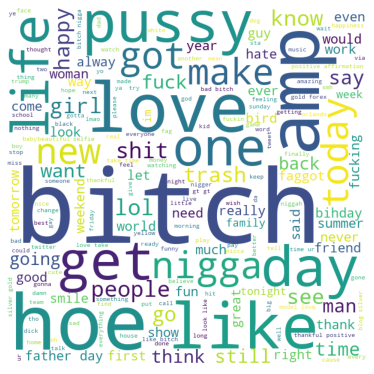

In [32]:
# visualizing the most frequent words using matplot library
comment_words = ' '
for words in df['tweet']: 
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 600, height = 600, 
                background_color='white' , 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

### TFIDF VECTORIZER (TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY)

In [33]:
# converting the words into numerical form or vector form.
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=8000)
x=cv.fit_transform(df['tweet']).toarray()

In [34]:
y=df['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### MODEL BUILDING - MULTINOMIAL NAIVE BAYES

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=1.0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[6234  592]
 [ 419 4104]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      6826
           1       0.87      0.91      0.89      4523

    accuracy                           0.91     11349
   macro avg       0.91      0.91      0.91     11349
weighted avg       0.91      0.91      0.91     11349

accuracy_score:  0.9109172614327253


In [38]:
import pickle
pickle.dump(cv, open('tfidf.pkl', 'wb'))    

In [39]:
pickle.dump(clf, open('model.pkl', 'wb'))

### MODEL EVALUATION

In [42]:
test = 'i hate my country'
data = [test]
fact = cv.transform(data).toarray()
pred = clf.predict(fact)
print("pred", pred)
if (int(pred)==1):
    print("hate speech and  offensive message")
else:
    print("ordinary message")

pred [1]
hate speech and  offensive message
